In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/hamzashaikh/Downloads/telco_customer_churn.csv")

In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [5]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'], errors='coerce')
df = df.dropna()
df.drop('Customer_ID', axis=1, inplace=True)

In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/20


2025-10-21 23:16:30.570354: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


176/176 [==============================] - 0s 888us/step - loss: 0.4724 - accuracy: 0.7608 - val_loss: 0.4362 - val_accuracy: 0.7811
Epoch 2/20
176/176 [==============================] - 0s 502us/step - loss: 0.4291 - accuracy: 0.7931 - val_loss: 0.4364 - val_accuracy: 0.7783
Epoch 3/20
176/176 [==============================] - 0s 509us/step - loss: 0.4194 - accuracy: 0.8029 - val_loss: 0.4357 - val_accuracy: 0.7711
Epoch 4/20
176/176 [==============================] - 0s 508us/step - loss: 0.4135 - accuracy: 0.8039 - val_loss: 0.4386 - val_accuracy: 0.7775
Epoch 5/20
176/176 [==============================] - 0s 502us/step - loss: 0.4097 - accuracy: 0.8105 - val_loss: 0.4342 - val_accuracy: 0.7790
Epoch 6/20
176/176 [==============================] - 0s 493us/step - loss: 0.4066 - accuracy: 0.8073 - val_loss: 0.4353 - val_accuracy: 0.7839
Epoch 7/20
176/176 [==============================] - 0s 482us/step - loss: 0.4038 - accuracy: 0.8119 - val_loss: 0.4360 - val_accuracy: 0.7818
Epo

In [12]:
new_customer = pd.DataFrame([{
    'Gender': 0, 'Senior_Citizen': 0, 'Partner': 1, 'Dependents': 0,
    'tenure': 12, 'Phone_Service': 1, 'Multiple_Lines': 0, 'Internet_Service': 0,
    'Online_Security': 2, 'Online_Backup': 0, 'Device_Protection': 1,
    'Tech_Support': 0, 'Streaming_TV': 0, 'Streaming_Movies': 1, 'Contract': 0,
    'Paperless_Billing': 1, 'Payment_Method': 2, 'Monthly_Charges': 50.0, 'Total_Charges': 500.0
}])

new_customer_scaled = scaler.transform(new_customer)
churn_prob = model.predict(new_customer_scaled)[0][0]
churn_label = int(churn_prob > 0.5)

print(f"Churn Probability: {churn_prob:.2f}")
print(f"Churn Prediction: {churn_label} ({'Yes' if churn_label==1 else 'No'})")

1/1 [==============================] - 0s 43ms/step
Churn Probability: 0.31
Churn Prediction: 0 (No)


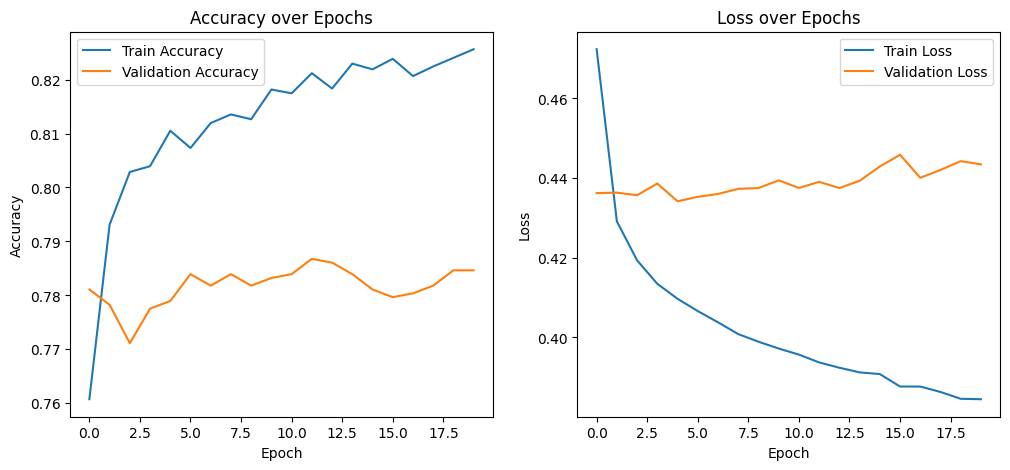

In [13]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()